Shortest distances from source:
Vertex 0: 0
Vertex 1: 5
Vertex 2: 4
Vertex 3: 8
Vertex 4: 7


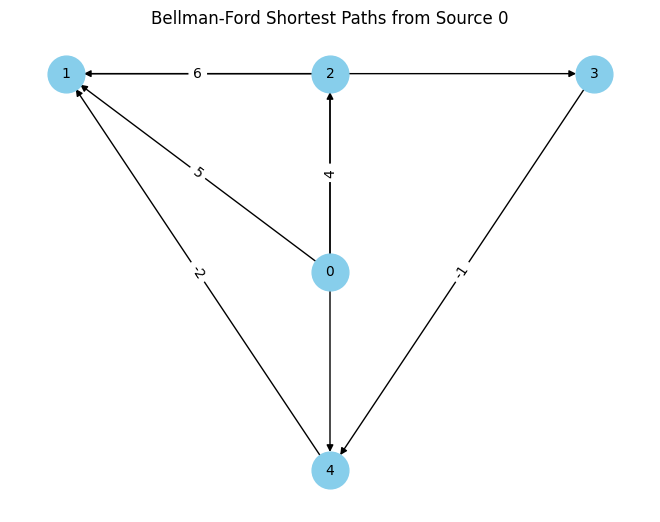

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        distance = [float("inf")] * self.vertices
        distance[src] = 0

        for _ in range(self.vertices - 1):
            for u, v, w in self.graph:
                if distance[u] != float("inf") and distance[u] + w < distance[v]:
                    distance[v] = distance[u] + w

        for u, v, w in self.graph:
            if distance[u] != float("inf") and distance[u] + w < distance[v]:
                print("Graph contains negative weight cycle")
                return

        print("Shortest distances from source:")
        for i in range(self.vertices):
            print(f"Vertex {i}:", distance[i])

        self.visualize_graph(src, distance)

    def visualize_graph(self, src, distance):
        G = nx.DiGraph()

        for u, v, w in self.graph:
            G.add_edge(u, v, weight=w)

        pos = {0: (0, 0), 1: (-1, 1), 2: (0, 1), 3: (1, 1), 4: (0, -1)}  # Adjusted positions for a diamond shape
        labels = {i: f"{i}\n{distance[i]}" for i in range(self.vertices)}

        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black")
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w for u, v, w in self.graph})

        plt.title(f"Bellman-Ford Shortest Paths from Source {src}")
        plt.show()


# Contoh penggunaan
g = Graph(5)
g.add_edge(0, 1, 5)
g.add_edge(0, 2, 4)
g.add_edge(1, 3, 3)
g.add_edge(2, 1, 6)
g.add_edge(2, 4, 7)
g.add_edge(3, 4, -1)
g.add_edge(4, 1, -2)

g.bellman_ford(0)
